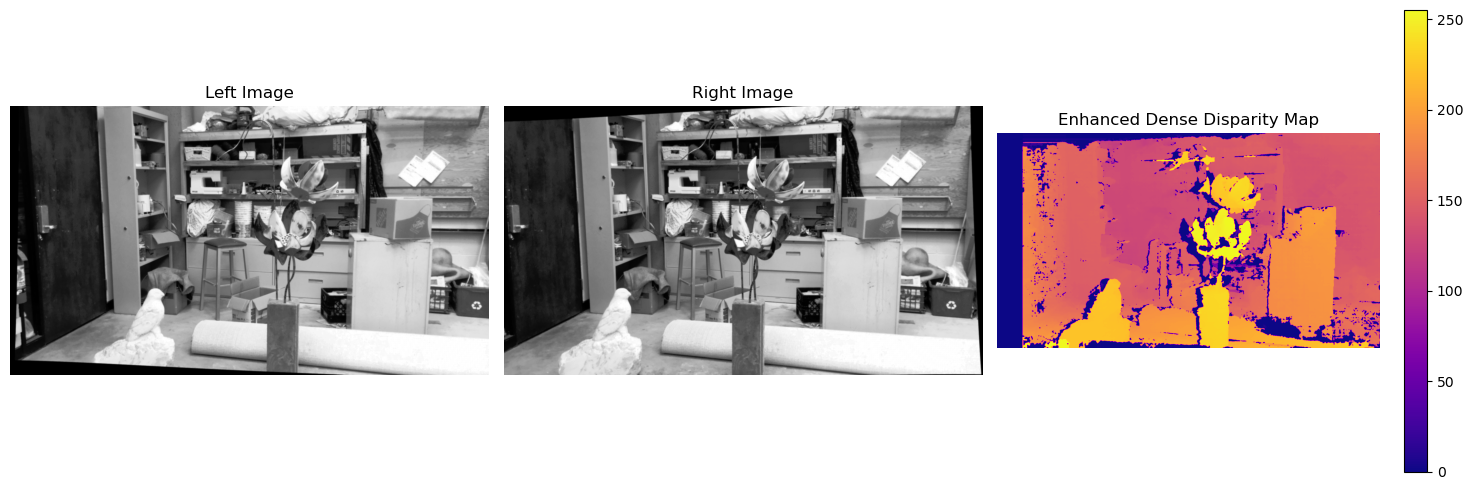

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the left and right images in grayscale
img_left = cv2.imread(r"F:\s1.png", cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread(r"F:\s2.png", cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if img_left is None or img_right is None:
    print("Error loading images.")
    exit()

# Preprocessing: Apply histogram equalization and Gaussian blur
img_left = cv2.equalizeHist(img_left)
img_right = cv2.equalizeHist(img_right)
img_left = cv2.GaussianBlur(img_left, (5, 5), 0)
img_right = cv2.GaussianBlur(img_right, (5, 5), 0)

# Parameters for StereoSGBM
min_disparity = 0
num_disparities = 128  # Larger range for more depth levels (multiple of 16)
block_size = 7         # Smaller block size for more detail

# Create StereoSGBM object with fine-tuned parameters
stereo = cv2.StereoSGBM_create(
    minDisparity=min_disparity,
    numDisparities=num_disparities,
    blockSize=block_size,
    P1=8 * 3 * block_size ** 2,
    P2=32 * 3 * block_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=5,
    speckleWindowSize=200,
    speckleRange=2
)

# Compute the disparity map
disparity_map = stereo.compute(img_left, img_right).astype(np.float32) / 16.0

# Post-processing: Apply median filtering to reduce noise
disparity_map = cv2.medianBlur(disparity_map, 5)

# Normalize the disparity map for visualization
disparity_map_normalized = cv2.normalize(disparity_map, None, 0, 255, cv2.NORM_MINMAX)
disparity_map_normalized = np.uint8(disparity_map_normalized)

# Plot the input images and the disparity map
plt.figure(figsize=(15, 5))

# Left image
plt.subplot(1, 3, 1)
plt.imshow(img_left, cmap='gray')
plt.title("Left Image")
plt.axis('off')

# Right image
plt.subplot(1, 3, 2)
plt.imshow(img_right, cmap='gray')
plt.title("Right Image")
plt.axis('off')

# Disparity map
plt.subplot(1, 3, 3)
plt.imshow(disparity_map_normalized, cmap='plasma')
plt.colorbar()
plt.title("Enhanced Dense Disparity Map")
plt.axis('off')

plt.tight_layout()
plt.show()
